<a href="https://colab.research.google.com/github/Juhi-Purswani/Offline_Signature_Verification/blob/master/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
 !ls

drive  sample_data


In [0]:
import os
os.chdir('./drive/My Drive/Signature_Forgery')

In [4]:
import cv2                 
import numpy as np         
import os                  
from random import shuffle 
from tqdm import tqdm 
import numpy as np

from keras.utils import to_categorical
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
TRAIN_DIR = 'data/train_set'
TEST_DIR = 'data/test_set'
IMG_SIZE = 28

In [0]:
def label_img(img):
    image_label = img.split('.')
    name = image_label[0]
    # checking if the signature is forged or genuine
    #                            
    
    if name[4:7] == name[-3:]:
        return 1
  
    elif name[4:7] != name[-3:]:
        return 0

def person_img(img):
    label = img.split('.')
    k = label[0]
    return [k[-3:]]


def create_features(DIR):
    features = []
    labels = []
    for img in tqdm(os.listdir(DIR)):
        label = label_img(img)
        person = person_img(img)
       
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        features.append([img])
        labels.append(np.array(label))
    #shuffle(training_data)
    #np.save('train_data.npy', training_data)
    return features

def create_labels(DIR):
    labels = []
    for img in tqdm(os.listdir(DIR)):
        label = label_img(img)
        labels.append(np.array(label))
    return labels

In [7]:
train_features  = np.array(create_features(TRAIN_DIR))
test_features  = np.array(create_features(TEST_DIR))
train_features_reshaped = train_features.reshape(-1, IMG_SIZE,IMG_SIZE, 1)
test_features_reshaped = test_features.reshape(-1, IMG_SIZE,IMG_SIZE, 1)

train_features_reshaped = train_features_reshaped.astype('float32')
test_features_reshaped = test_features_reshaped.astype('float32')
train_features_reshaped = train_features_reshaped / 255.
test_features_reshaped = test_features_reshaped / 255.

train_labels = np.array(create_labels(TRAIN_DIR))
test_labels = np.array(create_labels(TEST_DIR))


train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

100%|██████████| 121/121 [00:00<00:00, 209110.34it/s]


In [0]:
batch_size = 64
epochs = 50
num_classes = 2

In [18]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu',input_shape=(IMG_SIZE,IMG_SIZE,1),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(1000, activation='relu')) 
model.add(Dense(100, activation='relu'))  
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1569000   
_________________________________________________________________
dense_11 (Dense)             (None, 100)               100100    
__________

In [19]:
history = model.fit(train_features_reshaped, train_labels_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_features_reshaped, test_labels_one_hot))

Train on 179 samples, validate on 121 samples
Epoch 1/50
179/179 [==============================] - 1s 8ms/step - loss: 0.7099 - acc: 0.4581 - val_loss: 0.6970 - val_acc: 0.5041
Epoch 2/50
179/179 [==============================] - 0s 2ms/step - loss: 0.6984 - acc: 0.4972 - val_loss: 0.6930 - val_acc: 0.5041
Epoch 3/50
179/179 [==============================] - 0s 3ms/step - loss: 0.6958 - acc: 0.4078 - val_loss: 0.6926 - val_acc: 0.5207
Epoch 4/50
179/179 [==============================] - 0s 3ms/step - loss: 0.6921 - acc: 0.5419 - val_loss: 0.6927 - val_acc: 0.4959
Epoch 5/50
179/179 [==============================] - 0s 3ms/step - loss: 0.6971 - acc: 0.4413 - val_loss: 0.6922 - val_acc: 0.5041
Epoch 6/50
179/179 [==============================] - 0s 3ms/step - loss: 0.6897 - acc: 0.5587 - val_loss: 0.6922 - val_acc: 0.4959
Epoch 7/50
179/179 [==============================] - 0s 3ms/step - loss: 0.6894 - acc: 0.5251 - val_loss: 0.6914 - val_acc: 0.5207
Epoch 8/50
179/179 [==========

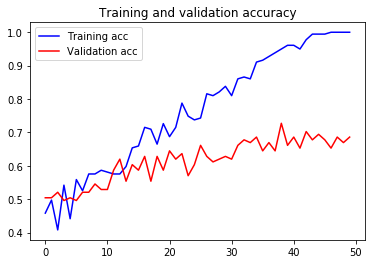

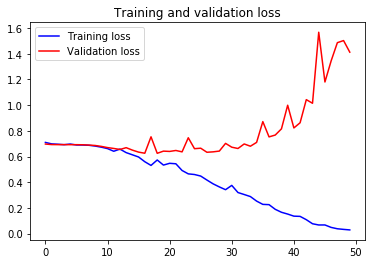

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [12]:
model2 = Sequential()
model2.add(Conv2D(64,kernel_size=(3,3),activation = 'relu',input_shape=(IMG_SIZE,IMG_SIZE,1),padding='same'))
model2.add(MaxPooling2D((2,2),padding='same'))
model2.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',padding='same'))
model2.add(MaxPooling2D((2,2),padding='same'))
model2.add(Flatten())
model2.add(Dense(512, activation='relu')) 
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu')) 
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='sigmoid'))
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model2.summary()

W0715 22:19:43.123279 139976471684992 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               803328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

In [13]:
batch_size = 64
epochs = 50
num_classes = 2

history = model2.fit(train_features_reshaped, train_labels_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_features_reshaped, test_labels_one_hot))

Train on 179 samples, validate on 121 samples
Epoch 1/50
179/179 [==============================] - 1s 5ms/step - loss: 0.6854 - acc: 0.5810 - val_loss: 0.6929 - val_acc: 0.5124
Epoch 2/50
179/179 [==============================] - 0s 2ms/step - loss: 0.7321 - acc: 0.4246 - val_loss: 0.6939 - val_acc: 0.5041
Epoch 3/50
179/179 [==============================] - 0s 2ms/step - loss: 0.6986 - acc: 0.4972 - val_loss: 0.6933 - val_acc: 0.4959
Epoch 4/50
179/179 [==============================] - 0s 2ms/step - loss: 0.6941 - acc: 0.5028 - val_loss: 0.6933 - val_acc: 0.4959
Epoch 5/50
179/179 [==============================] - 0s 2ms/step - loss: 0.6938 - acc: 0.5363 - val_loss: 0.6930 - val_acc: 0.5289
Epoch 6/50
179/179 [==============================] - 0s 2ms/step - loss: 0.6899 - acc: 0.5419 - val_loss: 0.6929 - val_acc: 0.4959
Epoch 7/50
179/179 [==============================] - 0s 2ms/step - loss: 0.6939 - acc: 0.4693 - val_loss: 0.6930 - val_acc: 0.4959
Epoch 8/50
179/179 [==========

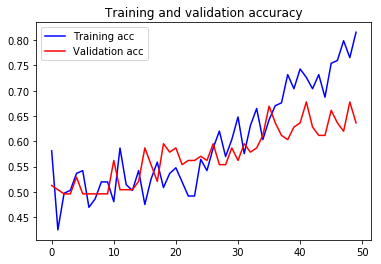

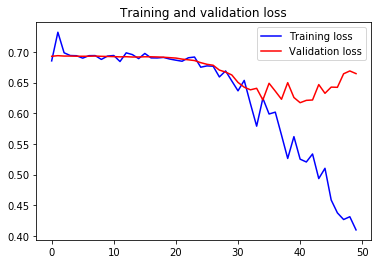

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()